In [1]:
import pandas as pd #used for data manipulation and analysis. It provides data structures like DataFrames.
import numpy as np # numerical computations in Python. It provides support for arrays, matrices, and mathematical functions.
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations.
import seaborn as sns # a statistical data visualization library built on Matplotlib. It provides a high-level interface for drawing attractive graphs.
# scikit-learn library, which is a popular tool for machine learning in Python:
from sklearn.model_selection import train_test_split #Used to split datasets into training and testing subsets for model evaluation.
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder # A preprocessing tool to standardize features by removing the mean and scaling to unit variance.
#Used to convert categorical variables into a one-hot encoded numeric array.
from sklearn.impute import SimpleImputer #Used to handle missing values by imputing them (e.g., replacing NaN with mean/median/mode).
from sklearn.compose import ColumnTransformer #Applies different transformations to different columns in a dataset (e.g., scaling numerical columns and one-hot encoding categorical columns).
from sklearn.pipeline import Pipeline #Chains multiple data processing steps (e.g., imputation, scaling, encoding) into a single object for streamlined workflow.

1. Load the dataset

In [ ]:
file_path = r"D:\ECU\Data-mining\Project\Lung Cancer.csv"
df = pd.read_csv(file_path)

2. Explore the dataset’s features and target variable

In [29]:
print("First 5 rows of the dataset:")
print(df.head())
print("Understand datatypes and nulls:")
print(df.info())
print("Summary statistics:")
print(df.describe())
print("Explore the target distribution:")
print(df['survived'].value_counts())

First 5 rows of the dataset:
   id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280             1       1          0   
2   Former Smoker  44.0                268             1       1          0   
3  Passive Smoker  43.0                241             1       1          0   
4  Passive Smoker  19.7                178             0       0          0   

   other_cancer treat

3. Handle missing values and outliers

In [30]:
print(df.isnull().sum())


id                         0
age                        0
gender                     0
country                    0
diagnosis_date             0
cancer_stage               0
family_history             0
smoking_status             0
bmi                        0
cholesterol_level          0
hypertension               0
asthma                     0
cirrhosis                  0
other_cancer               0
treatment_type             0
end_treatment_date         0
survived                   0
treatment_duration_days    0
dtype: int64


In [34]:
# def detect_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     return outliers

# # Example: detect outliers in 'bmi'
# bmi_outliers = detect_outliers_iqr(df, 'bmi')
# print("BMI Outliers:")
# print(bmi_outliers[['id', 'bmi']])


def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]

        if outlier_count > 0:
            outlier_summary[col] = {
                'count': outlier_count,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outliers': outliers[[col]]
            }

    return outlier_summary

# Run detection
outliers_by_column = detect_outliers_iqr(df)

# Print summary
for col, info in outliers_by_column.items():
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {info['count']}")
    print(f"Lower bound: {info['lower_bound']:.2f}, Upper bound: {info['upper_bound']:.2f}")
    print(info['outliers'])



Column: age
Number of outliers: 3895
Lower bound: 27.00, Upper bound: 83.00
         age
23      21.0
477     85.0
576     87.0
755     25.0
760     90.0
...      ...
889121  26.0
889411  87.0
889611  84.0
889771  84.0
889858  87.0

[3895 rows x 1 columns]

Column: hypertension
Number of outliers: 222479
Lower bound: 1.00, Upper bound: 1.00
        hypertension
0                  0
4                  0
6                  0
8                  0
11                 0
...              ...
889990             0
889991             0
889994             0
889996             0
889999             0

[222479 rows x 1 columns]

Column: cirrhosis
Number of outliers: 201101
Lower bound: 0.00, Upper bound: 0.00
        cirrhosis
0               1
13              1
15              1
20              1
22              1
...           ...
889980          1
889983          1
889984          1
889992          1
889995          1

[201101 rows x 1 columns]

Column: other_cancer
Number of outliers: 78460
Low

Remove Outliers

In [39]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_no_outliers = remove_outliers(df.copy())
print(df_no_outliers.head())

    id   age  gender  country diagnosis_date cancer_stage family_history  \
2    3  65.0  Female  Hungary     2023-04-05    Stage III            Yes   
3    4  51.0  Female  Belgium     2016-02-05      Stage I             No   
5    6  50.0    Male    Italy     2023-01-02      Stage I             No   
7    8  51.0    Male  Denmark     2017-02-18     Stage IV            Yes   
14  15  67.0  Female   Poland     2023-04-12     Stage II            Yes   

    smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
2    Former Smoker  44.0                268             1       1          0   
3   Passive Smoker  43.0                241             1       1          0   
5     Never Smoked  37.6                274             1       0          0   
7    Former Smoker  25.8                195             1       1          0   
14   Former Smoker  42.7                259             1       1          0   

    other_cancer treatment_type end_treatment_date  survived  

4. Perform feature scaling or normalization

In [43]:
numeric_cols = df.select_dtypes(include='number').columns
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df_normalized[numeric_cols].describe())

                  id            age            bmi  cholesterol_level  \
count  890000.000000  890000.000000  890000.000000      890000.000000   
mean        0.500000       0.510070       0.499799           0.557559   
std         0.288676       0.099945       0.288570           0.289549   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.250000       0.440000       0.251724           0.306667   
50%         0.500000       0.510000       0.500000           0.613333   
75%         0.750000       0.580000       0.748276           0.806667   
max         1.000000       1.000000       1.000000           1.000000   

        hypertension         asthma      cirrhosis   other_cancer  \
count  890000.000000  890000.000000  890000.000000  890000.000000   
mean        0.750024       0.469740       0.225956       0.088157   
std         0.432999       0.499084       0.418211       0.283524   
min         0.000000       0.000000       0.000000       0.000000 

5. Split the dataset into training and testing sets

In [ ]:
# 2. Define features (X) and target (y)
X = df.drop('survived', axis=1)  # All columns except 'survived'
y = df['survived']               # The target column

# 3. Encode categorical features
# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing, 80% for training
    random_state=42,      # Ensures reproducibility
    stratify=y            # Keeps class distribution balanced (important for classification)
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


In [45]:
#  engineer a new column that calculates how long the patient was under treatment:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])

df['treatment_duration_days'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

print(df[['id', 'diagnosis_date', 'end_treatment_date', 'treatment_duration_days']].head())

   id diagnosis_date end_treatment_date  treatment_duration_days
0   1     2016-04-05         2017-09-10                      523
1   2     2023-04-20         2024-06-17                      424
2   3     2023-04-05         2024-04-09                      370
3   4     2016-02-05         2017-04-23                      443
4   5     2023-11-29         2025-01-08                      406


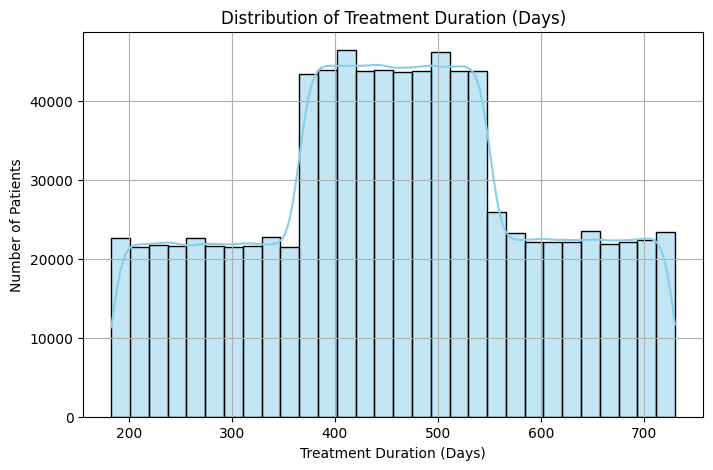

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df['treatment_duration_days'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Treatment Duration (Days)")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()

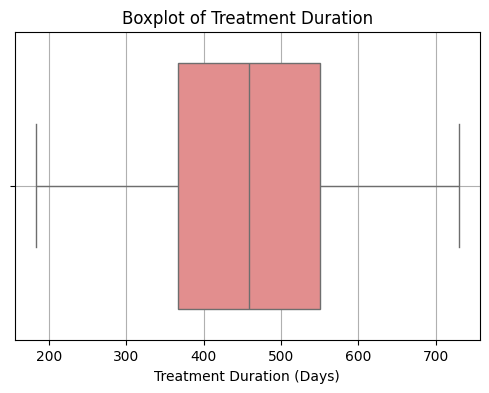

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['treatment_duration_days'], color="lightcoral")
plt.title("Boxplot of Treatment Duration")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.show()
